In [164]:
# モジュールのインポート
from matplotlib import pyplot
from matplotlib import patches
import random
import numpy as np
import array
import math

from itertools import repeat
from collections.abc import Sequence
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
%matplotlib inline

In [165]:
# roomというclassを作る
class Room():
    def __init__(self,n,m,w=0,l=3,x=0,ud=3):
        self.n = n # number
        self.m = m # move_frequency
        self.w = w # width
        self.l = l # length
        self.x = x # exitpoint
        self.ud = ud # up and down
    # aとbとの距離
    def distance(self,b):
        return (abs( self.x - b.x )+ abs( self.ud - b.ud )) * self.m[b.n-1]
    # 壁
    def wall(self):
        return (self.w+self.l)*2
    # 床
    def floor(self):
        if self.w == 1:
            S = self.w*self.l+5*(8-self.l)+28
        elif self.l == 1:
            S = self.w*self.l+5*(8-self.w)+28
        elif self.w == 2 and self.l == 2:
            S = self.w*self.l+5
        else:
            S = (self.w*self.l)
        return S
    # 左の座標
    def leftpoint(self):
        return self.x-self.w/2
    # 右の座標
    def rightpoint(self):
        return self.x+self.w/2
    def display(self):
        print(f"番号:{self.n}　幅:{self.w}　奥行:{self.l}　ドア:{self.x}　北南:{self.ud}")

In [166]:
dim = [random.randint(1,8) for i in range(16)]
print(dim)
for i in dim:
    print(bin(i))

[3, 3, 4, 6, 8, 1, 5, 8, 8, 4, 8, 4, 8, 1, 8, 8]
0b11
0b11
0b100
0b110
0b1000
0b1
0b101
0b1000
0b1000
0b100
0b1000
0b100
0b1000
0b1
0b1000
0b1000


In [167]:
# 遺伝子を生成
def room_gene():
    seq = [random.sample(range(0,9),9)] # 順番
    dim_gap = [random.randint(0,1) for i in range(54)]# 縦と横、北と南の部屋群とのずれ
    gene = seq + dim_gap
    return gene

# 遺伝子を用途ごとに分解し、二進数を十進数に変換
def disassembly(individual):
    seq = individual[0]
    gap = individual[1:7]
    dim = individual[7:]
    deci_gap = 1
    _gap = gap[1:]
    for i, bit in enumerate(reversed(_gap)):
        if bit == 1:
            deci_gap += 2 ** i
    if gap[0] == 0:
        deci_gap = deci_gap * -1
    deci_dim = []
    n = 3
    for i in range(0, len(dim), n):
        decimal_num = 1
        for i, bit in enumerate(reversed(dim[i: i+n])):
            if bit == 1:
                decimal_num += 2 ** i
        deci_dim.append(decimal_num)
    return seq, deci_gap, deci_dim

# 割り当て
def quota(Rooms,individual):
    seq, gap, dim = disassembly(individual)
    dim = np.array(dim).reshape(8,2)
    Corridor = Rooms.pop(0)
    for room in Rooms:
        n = room.n - 1
        room.w = dim[n][0]
        room.l = dim[n][1]
    ln,ls,c = 0, 0, 0
    divine = seq.index(0)
    seq.remove(0)
    rearrang_rooms = [Rooms[i-1] for i in seq]

    for rearrang_room in rearrang_rooms:
        c = c + 1
        if c <= divine:
            rearrang_room.ud = 0
            ln += rearrang_room.w
        else:
            rearrang_room.ud = 1
            ls += rearrang_room.w
    n, s = [0], [(ln-ls) / 2 + gap]
    for rearrang_room in rearrang_rooms:
        if rearrang_room.ud == 0:
            rearrang_room.x = sum(n) + rearrang_room.w/2
            n.append(rearrang_room.w)
        else:
            rearrang_room.x = sum(s) + rearrang_room.w/2
            s.append(rearrang_room.w)

    Corridor.w = max(rearrang_rooms[divine-1].leftpoint(),rearrang_rooms[-1].leftpoint()) - min(rearrang_rooms[0].leftpoint(),rearrang_rooms[divine].leftpoint())
    Corridor.x = min(rearrang_rooms[0].leftpoint(),rearrang_rooms[divine].leftpoint()) + corridor.w/2
    
    # Pillarcount
    corrdinate0,corrdinate1 = [],[]
    for Room in Rooms:
        if Room.ud == 0:
            corrdinate0.append((Room.leftpoint(),0))
            corrdinate0.append((Room.leftpoint(),Room.l))
            corrdinate0.append((Room.rightpoint(),0))
            corrdinate0.append((Room.rightpoint(),Room.l))
        else:
            corrdinate1.append((Room.leftpoint(),1))
            corrdinate1.append((Room.leftpoint(),Room.l))
            corrdinate1.append((Room.rightpoint(),1))
            corrdinate1.append((Room.rightpoint(),Room.l))
    Pillarcount = len(set(corrdinate0))+len(set(corrdinate1)) + 2
    if rearrang_rooms[0].leftpoint()==rearrang_rooms[divine].leftpoint():
        Pillarcount += -1
    if rearrang_rooms[divine-1].leftpoint()==rearrang_rooms[-1].leftpoint():
        Pillarcount += -1
    
    return Rooms,Pillarcount

In [195]:
Rooms = [Corridor,Room_1,Room_2,Room_3,Room_4,Room_5,Room_6,Room_7,Room_8]
individual = room_gene()
print(individual)
dim = np.array(dim).reshape(8,2)
corridor = Rooms.pop(0)
for room in Rooms:
    n = room.n - 1
    room.w = dim[n][0]
    room.l = dim[n][1]
ln,ls,c = 0, 0, 0
divine = seq.index(0)
seq.remove(0)
rearrang_rooms = [Rooms[i-1] for i in seq]

for rearrang_room in rearrang_rooms:
    c = c + 1
    if c <= divine:
        rearrang_room.ud = 0
        ln += rearrang_room.w
    else:
        rearrang_room.ud = 1
        ls += rearrang_room.w
n, s = [0], [(ln-ls) / 2 + gap]
for rearrang_room in rearrang_rooms:
    if rearrang_room.ud == 0:
        rearrang_room.x = sum(n) + rearrang_room.w/2
        n.append(rearrang_room.w)
    else:
        rearrang_room.x = sum(s) + rearrang_room.w/2
        s.append(rearrang_room.w)

corridor.w = max(rearrang_rooms[divine-1].leftpoint(),rearrang_rooms[-1].leftpoint()) - min(rearrang_rooms[0].leftpoint(),rearrang_rooms[divine].leftpoint())
corridor.x = min(rearrang_rooms[0].leftpoint(),rearrang_rooms[divine].leftpoint()) + corridor.w/2


for i in range(8):
    Rooms[i].display() 
Rooms[4].display()
corridor.display()

[[3, 6, 8, 2, 5, 0, 4, 1, 7], 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0]


ValueError: 0 is not in list

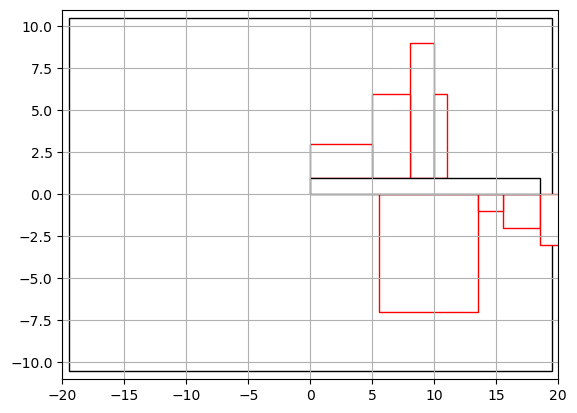

番号:1　幅:8　奥行:7　ドア:9.5　北南:1
番号:2　幅:2　奥行:8　ドア:9.0　北南:0
番号:3　幅:3　奥行:2　ドア:17.0　北南:1
番号:4　幅:3　奥行:3　ドア:20.0　北南:1
番号:5　幅:1　奥行:5　ドア:10.5　北南:0
番号:6　幅:3　奥行:5　ドア:6.5　北南:0
番号:7　幅:2　奥行:1　ドア:14.5　北南:1
番号:8　幅:5　奥行:2　ドア:2.5　北南:0
番号:5　幅:1　奥行:5　ドア:10.5　北南:0
番号:0　幅:18.5　奥行:1　ドア:9.25　北南:3


In [197]:
Rooms = [Corridor,Room_1,Room_2,Room_3,Room_4,Room_5,Room_6,Room_7,Room_8]
Best = [[8, 6, 2, 5, 0, 1, 7, 3, 4], 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

conf(Best)
for i in range(8):
    Rooms[i].display() 
Rooms[4].display()
Corridor.display()

In [194]:
# 設定（部屋番号,部屋と部屋の間の移動コスト）
Corridor = Room(0,0,l=1,ud=3) # 廊下
Room_1 = Room(1,[0,1,1,1,1,1,1,1])
Room_2 = Room(2,[1,0,1,1,1,1,1,1])
Room_3 = Room(3,[1,1,0,1,1,1,1,1])
Room_4 = Room(4,[1,1,1,0,1,1,1,1])
Room_5 = Room(5,[1,1,1,1,0,1,1,1])
Room_6 = Room(6,[1,1,1,1,1,0,1,1])
Room_7 = Room(7,[1,1,1,1,1,1,0,1])
Room_8 = Room(8,[1,1,1,1,1,1,1,0])

Rooms = [Corridor,Room_1,Room_2,Room_3,Room_4,Room_5,Room_6,Room_7,Room_8]

In [170]:
# 評価関数
def Eval(individual):
    seq, gap, dim = disassembly(individual)
    global Rooms
    Rooms = quota(Rooms,individual)
    
    distance = []
    F = []
    W = []
    P = [26]
    
    for room in Rooms:
        distance.append(sum([room.distance(i) for i in Rooms]))
        F.append(room.floor())
        W.append(room.wall()**2)
        
        

    # construction_cost
    a,b,c=3000,109,14200
    dfl,dwl,wbs,dbs,hbm,hbs,wbm,h,aw=0.12,0.1,0.6,0.3,0.8,0.92,0.6,3.1,0.5
    # 床
    C1 = 2*(a+100*b*dfl+c*dfl)+100*b*dbs+c*dbs
    # 壁
    C2 = a*(wbm-dwl+2*(hbm-dfl))+(100*b+c)*wbm*(hbm-dfl)+2*a*(h-hbm)+(100*b+c)*dwl(h-hbm)+2*a*(hbs-dfl)+(100*b+c)*(Wbs*(hbs-dfl))
    # 柱
    C3 = 4*a*aw*(h-dfl)+100*b*aw*aw*(h-dfl)+c*aw*aw*(h-dfl)
    Cc = C1*sum(S)+C2*sum(F)+C3*sum(A)
    
    Tc = sum(distance)

    return Cc,Tc

In [171]:
# 交叉
def CX(ind1, ind2):
    
    seq1, gap1, dim1 = disassembly(ind1)
    seq2, gap2, dim2 = disassembly(ind2)
    
    if random.random() < 0.5:
        ## cxTwoPoint
        size = min(len(ind1), len(ind2))
        cxpoint1 = random.randint(1, size)
        cxpoint2 = random.randint(1, size - 1)
        if cxpoint2 >= cxpoint1:
            cxpoint2 += 1
        else:  # Swap the two cx points
            cxpoint1, cxpoint2 = cxpoint2, cxpoint1

        ind1[cxpoint1:cxpoint2], ind2[cxpoint1:cxpoint2] \
            = ind2[cxpoint1:cxpoint2], ind1[cxpoint1:cxpoint2]
    else:
        a = random.random()
        if a < 0.25:
            start_point1[0],start_point2[1] = start_point2[0],start_point1[1]
        elif 0.25 <= a and a < 0.5:
            start_point1[1],start_point2[0] = start_point2[1],start_point1[0]
        elif 0.5 <= a and a < 0.75:
            start_point1[0],start_point2[0] = start_point2[0],start_point1[0]
        else:
            if random.random() < 0.5:
                divine1 = divine2
            else:
                divine2 = divine1

    ind1 = ind1.flatten()
    ind1 = np.append(np.append(start_point1,divine1),ind1)
    ind2 = ind2.flatten()
    ind2 = np.append(np.append(start_point2,divine2),ind2)
    return ind1, ind2

In [172]:
# 突然変異
def MUT(individual):
    start_point, divine, ind, seq = disassembly(individual)
    size = len(ind)
    if random.random() < 0.5:
        # mutswapIndexes
        swpoint1 = random.randint(0, size - 1)
        swpoint2 = random.randint(0, size - 2)
        if swpoint2 >= swpoint1:
            swpoint2 += 1
        else:
            swpoint1, swpoint2 = swpoint2, swpoint1
        ind = np.insert(ind, swpoint1, ind[swpoint2], axis=0)
        ind = np.delete(ind,swpoint1+1,axis=0)
        ind = np.insert(ind, swpoint2, ind[swpoint1], axis=0)
        ind = np.delete(ind,swpoint2+1,axis=0)
    else:
        # mutchangeIndexes
        cgpoint = random.randint(0,size - 1)
        ind_ = np.hstack((ind[cgpoint][0],[random.randint(1,10)],[random.randint(1,10)] ))
        ind = np.insert(ind, cgpoint, ind_, axis=0)
        ind = np.delete(ind,cgpoint+1,axis=0)
        
    if random.random() < 0.5:
        start_point = [random.randint(0,10),random.randint(0,10)]
    else:
        divine = random.randint(0,10)
    
    ind = ind.flatten()
    individual = np.append(np.append(start_point,divine),ind)
    return individual,

In [173]:
# 定義
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# 初期条件を構築
toolbox.register("individual", tools.initIterate, creator.Individual, room_gene)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 評価関数、交差、突然変異、選択淘汰
toolbox.register("evaluate", Eval)
toolbox.register("mate", CX)
toolbox.register("mutate", MUT)
toolbox.register("select", tools.selTournament, tournsize=100)

C:\Users\msy-t\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\msy-t\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [196]:
def conf(best_ind):
    seq, gap, dim = disassembly(best_ind)
    global Rooms
    Rooms,Pillarcount = quota(Rooms,best_ind)

    fig, ax = pyplot.subplots()

    ax.set_xlim([-20,20])
    ax.set_ylim([-11,11])
    ax.grid()
    ax.add_patch(patches.Rectangle( xy=(-19.5,-10.5) ,facecolor="white",edgecolor="black", width=39, height=21))

    for room in Rooms:
        if room.ud == 0:
            ud = 1
        else:
            ud = -1*room.l
        r = patches.Rectangle( xy=(room.x-room.w/2,ud) ,facecolor="white",edgecolor="red", width=room.w, height=room.l) 
        ax.add_patch(r)
    ax.add_patch(patches.Rectangle( xy=(Corridor.x-Corridor.w/2,0) ,facecolor="white",edgecolor="black", width=Corridor.w, height=1))

    #pyplot.axis('off')
    pyplot.show()

In [185]:
def main(n,CXPB, MUTPB ,NGEN):
    pop = toolbox.population(n=300)
    CXPB, MUTPB ,NGEN = CXPB, MUTPB ,NGEN

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    fits = [ind.fitness.values[0] for ind in pop]
    
    g = 0
    while  g < NGEN :
        g = g + 1
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        pop[:] = offspring

        fits = [ind.fitness.values[0] for ind in pop]
        
        
        # 母集団の最小、最大、平均、標準偏差を表示
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        log_min.append(min(fits))
        log_max.append(max(fits))
        log_mean.append(mean)
        log_std.append(std)
        gen = list(range(0, NGEN+1))

        print('%2d　　  %4d　  %5d　　%5d　　%5d　 %5d' % (g,len(invalid_ind),mean,std,min(fits),max(fits)))
    print("-- End of (successful) evolution --")
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    return best_ind, gen, log_min, log_max, log_mean, log_std

In [186]:
# 実行
n = 300
CXPB, MUTPB ,NGEN = 0.5, 0.9, 30
if __name__ == "__main__":
    best_ind, gen, log_min, log_max, log_mean, log_std = main(n,CXPB, MUTPB ,NGEN)
conf(best_ind)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (55,) + inhomogeneous part.

In [ ]:

lst = [(1,2),(2,4),(1,2)]
lst.append((2,4),(3,4))
len(set(lst))